## Learning Curves: Diagnosing Underfiltting and Overfitting

### Learning curves are powerful diagnostic tools that help you understand whether your model is underfitting (too simple) or overfitting (too complex) by showing how the model's performance changes as it sees more training data.


### The Concept

A learning curve plots a model's performance on both:

1. Training set - How well the model fits the data it was trained on
2. Validation set - How well the model generalizes to unseen data as a function of the training set size


### Typical Learning Curve Patterns


1. Underfitting Model (High Bias)


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [3]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=10
    )
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.grid(True)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

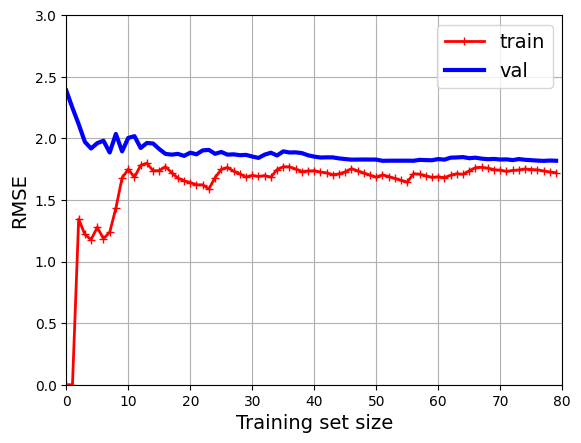

In [4]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Characteristics of Underfitting

- Both training and validation errors are **high**
- The two curves are **close together** (small gap)
- Adding more data won't help - the model is fundamentally too simple

If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.


2. Overfitting Model (High Varience)

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data.


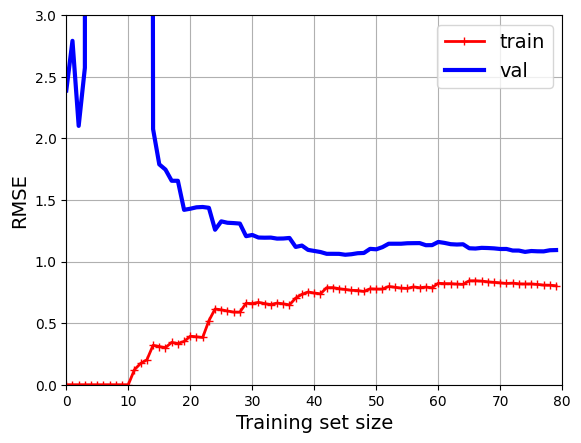

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ]
)

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Characteristics of Overfitting:

- Training error is **very low** (model fits training data almost perfectly)
- Validation error is **much higher** than training model (large gap)
- The model **memorizes** the training data but doesn't generalize well
- Adding more training data **can help** reduce the gap


3. Well-Fitting Model (Ideal Case)


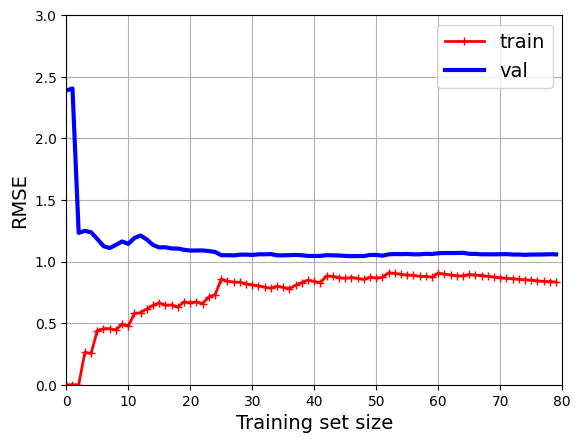

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ]
)

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Characteristics of Well-Fitting:

- Both training and validation errors are low
- Small gap between curves
- Errors stabilize as more data is added


## The Bias/Varience Trade-off

### Bias Error

- Cause - Wrong assumptions about the data pattern
- Example - Using linear model from quadratic data
- Solution - Use more complex model or better features
- Diagnosis - High error on both training and validation sets

### Varience Error

- Cause - Model is too sensitive to train data noise
- Example - Very high-degree polynomial
- Solution - User simpler model, regularization, or more training data
- Diagnosis - Low training error but high validation error

### Irreducible Error

- Cause - Inherent noise in the data
- Solution - Clean data, remove outliers, improve data collection

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off


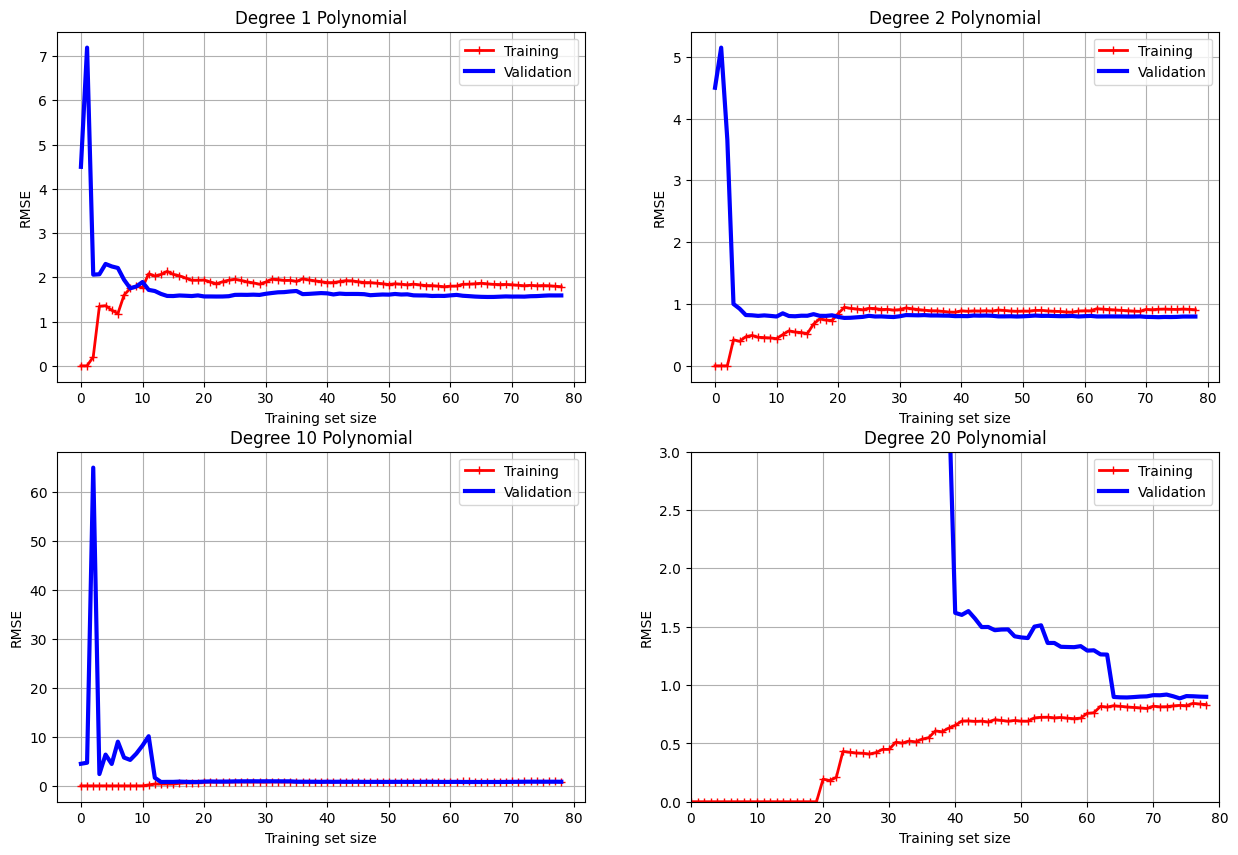

In [11]:
# Practice Example: Comparing Different Models
degrees = [1, 2, 10, 20]
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    polynomial_regression = Pipeline(
        [
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ]
    )

    plt.subplot(2, 2, i + 1)

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        polynomial_regression.fit(X_train[:m], y_train[:m])
        y_train_predict = polynomial_regression.predict(X_train[:m])
        y_val_predict = polynomial_regression.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
    plt.title(f"Degree {degree} Polynomial")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)

plt.axis([0, 80, 0, 3])
plt.show()

1. Degree 1 Polynomial
- Training error: ~1.8
- Validation error: ~1.8 (almost the same as training)
- Both errors stay relatively **high** and don’t reduce much with more data
- **Interpretation**: This is **underfitting (high bias)**. A straight line cannot capture quadratic data well.

2. Degree 2 Polynomial
- Training error: starts low, converges ~0.9
- Validation error: also ~0.9, almost overlapping with training
- Both errors stabilize as dataset grows
- **Interpretation**: This is a **good fit (low bias, low variance)**. Since the true data is quadratic, a degree-2 polynomial matches it almost perfectly.

3. Degree 10 Polynomial
- Training error: near 0 (fits training points very tightly)
- Validation error: spikes extremely high early (variance) but decreases when more training samples are added
- Still, validation error remains unstable
- **Interpretation**: This is **overfitting (high variance)**. The model is too flexible, fits noise in small datasets, and struggles to generalize

4. Degree 20 Polynomial
- Training error: very low (<0.5)
- Validation error: starts high, fluctuates, then stabilizes ~0.9
- Better than degree 10, but still has signs of variance
- **Interpretation**: Still **overfitting**, though less chaotic than degree 10 because more data stabilizes it